Import Block

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

Data Exploratory


In [2]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/christiandoxa/usahaq_ml/master/Dataset/Dataset%20Bahan%20Pokok/daftar-harga-cabai-merah-besar-malang-2017-2021.csv?token=ARB4LTH637ABU4Q3VIWIP6LAXY3YM \
    -O /tmp/big-chilli.csv

--2021-05-31 15:40:32--  https://raw.githubusercontent.com/christiandoxa/usahaq_ml/master/Dataset/Dataset%20Bahan%20Pokok/daftar-harga-cabai-merah-besar-malang-2017-2021.csv?token=ARB4LTH637ABU4Q3VIWIP6LAXY3YM
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15901 (16K) [text/plain]
Saving to: ‘/tmp/big-chilli.csv’

/tmp/big-chilli.csv 100%[===================>]  15.53K  --.-KB/s    in 0s      

2021-05-31 15:40:33 (51.8 MB/s) - ‘/tmp/big-chilli.csv’ saved [15901/15901]



In [3]:
#Read dataset with pandas, then put it to big-chilli_df variable
big_chilli_df = pd.read_csv('/tmp/big-chilli.csv')
big_chilli_df

tanggal  harga
0    2017-08-02  11500
1    2017-08-03  11500
2    2017-08-04  11500
3    2017-08-07  11500
4    2017-08-08  11500
..          ...    ...
935  2021-05-24  17500
936  2021-05-25  17500
937  2021-05-27  13500
938  2021-05-28  13500
939  2021-05-31  13500

[940 rows x 2 columns]

In [4]:
#Inspect the first 5 of big_chilli_df dataframe
big_chilli_df.head()

tanggal  harga
0  2017-08-02  11500
1  2017-08-03  11500
2  2017-08-04  11500
3  2017-08-07  11500
4  2017-08-08  11500

In [5]:
#Inspect the last 5 of big_chilli_df dataframe
big_chilli_df.tail()

tanggal  harga
935  2021-05-24  17500
936  2021-05-25  17500
937  2021-05-27  13500
938  2021-05-28  13500
939  2021-05-31  13500

In [6]:
#Inspect the describtion of big_chilli_df dataframe
big_chilli_df.describe()

harga
count    940.000000
mean   22956.117021
std    12399.494876
min     6000.000000
25%    14000.000000
50%    20000.000000
75%    29000.000000
max    60000.000000

In [7]:
#Casting harga's column to float
big_chilli_df['harga'] = pd.to_numeric(big_chilli_df['harga'], downcast='float')
print(big_chilli_df)
print(big_chilli_df.dtypes)

        tanggal    harga
0    2017-08-02  11500.0
1    2017-08-03  11500.0
2    2017-08-04  11500.0
3    2017-08-07  11500.0
4    2017-08-08  11500.0
..          ...      ...
935  2021-05-24  17500.0
936  2021-05-25  17500.0
937  2021-05-27  13500.0
938  2021-05-28  13500.0
939  2021-05-31  13500.0

[940 rows x 2 columns]
tanggal     object
harga      float32
dtype: object


In [8]:
#Normalize harga's column data by dividing it with the largest number
max = big_chilli_df['harga'].max()
big_chilli_df['harga'] /= max

In [9]:
big_chilli_df

tanggal     harga
0    2017-08-02  0.191667
1    2017-08-03  0.191667
2    2017-08-04  0.191667
3    2017-08-07  0.191667
4    2017-08-08  0.191667
..          ...       ...
935  2021-05-24  0.291667
936  2021-05-25  0.291667
937  2021-05-27  0.225000
938  2021-05-28  0.225000
939  2021-05-31  0.225000

[940 rows x 2 columns]

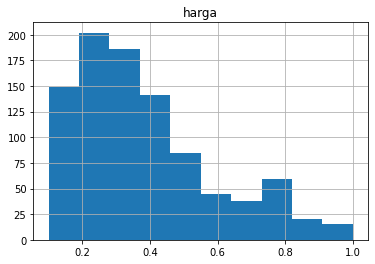

In [10]:
_ = big_chilli_df.hist()

In [11]:
#Get the price and time step from dataframe
temp = big_chilli_df['harga']
price = np.array(temp.tolist())
time = np.array([i[0] for i in enumerate(price)])

In [12]:
#Helper function for plotting dataset
def plot_dataset(time, series, title, xlabel, ylabel, color='b'):
  plt.plot(time, series, '{}-'.format(color))
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid=True

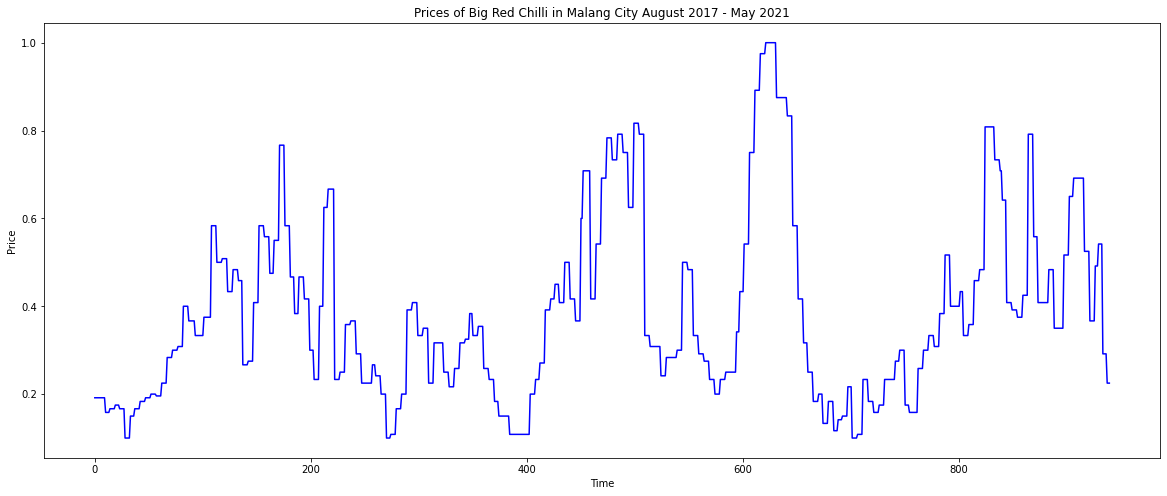

In [13]:
#Plot the dataset
plt.figure(figsize=(20, 8))
plot_dataset(time=time, series=price, color='b', title='Prices of Big Red Chilli in Malang City August 2017 - May 2021', xlabel='Time', ylabel='Price')

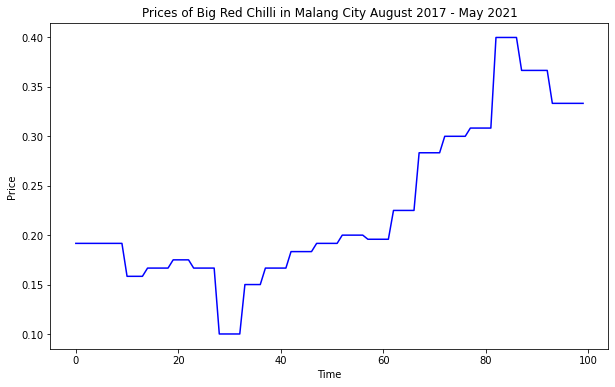

In [14]:
plt.figure(figsize=(10, 6))
plot_dataset(time=time[:100], series=price[:100], color='b', title='Prices of Big Red Chilli in Malang City August 2017 - May 2021', xlabel='Time', ylabel='Price')

Split Train and Test

In [15]:
#Split dataset with 70% of training, 20% for validation, and the rest for testing
split = round(0.7*len(price))
split_val = round(0.9*len(price))
train_price = price[:split]
train_time = time[:split]
val_price = price[split:split_val]
val_time = time[split:split_val]
test_price = price[split_val:]
test_time = time[split_val:]

Window the Dataset 

In [16]:
#Helper function for windowing the dataset
def dataset_window(list, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(temp, axis=-1)
  data_window = tf.data.Dataset.from_tensor_slices(series)
  data_window = data_window.window(window_size + 1, shift = 1, drop_remainder= True)
  data_window = data_window.flat_map(lambda x: x.batch(window_size+1))
  data_window = data_window.shuffle(shuffle_buffer)
  data_window = data_window.map(lambda x: (x[:-1], x[1:]))
  data_window = data_window.batch(batch_size).prefetch(1)
  return data_window

Function for Forecasting the Model for Fit It Into the Plotted Graph

In [17]:
#Helper function for forecasting
def forecast_model(model, series, window_size):
  data_forecast = tf.data.Dataset.from_tensor_slices(series)
  data_forecast = data_forecast.window(window_size, shift=1, drop_remainder=True)
  data_forecast = data_forecast.flat_map(lambda x: x.batch(window_size))
  data_forecast = data_forecast.batch(32).prefetch(1)
  print(data_forecast)
  forecast = model.predict(data_forecast)
  return forecast

Window Size, Batch Size, & Shuffle Buffer

In [18]:
window_size = 45
batch_size = 512
shuffle_buffer = 1000

Build the Model

In [19]:
#Building model with learning rate scheduler, so we can pick the best learning rate
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = dataset_window(train_price, window_size, batch_size, shuffle_buffer)

print(train_set)
print(train_price.shape)

model = tf.keras.models.Sequential([
          tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1,
                                 padding='causal', activation='relu',
                                 input_shape=[None,1]),
          tf.keras.layers.LSTM(32, return_sequences=True),
          tf.keras.layers.LSTM(16, return_sequences=True),
          tf.keras.layers.Dense(16, activation='relu'),
          tf.keras.layers.Dense(1),
])
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda x: 1e-8 * 10**(x/20))
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9),
              metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit(train_set, epochs=200, callbacks=[learning_rate_scheduler])


<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float32, tf.float32)>
(658,)
Epoch 1/200
2/2 [==============================] - 35s 191ms/step - loss: 0.1214 - mean_absolute_error: 0.4375
Epoch 2/200
2/2 [==============================] - 0s 26ms/step - loss: 0.1214 - mean_absolute_error: 0.4375
Epoch 3/200
2/2 [==============================] - 0s 22ms/step - loss: 0.1214 - mean_absolute_error: 0.4375
Epoch 4/200
2/2 [==============================] - 0s 23ms/step - loss: 0.1214 - mean_absolute_error: 0.4375
Epoch 5/200
2/2 [==============================] - 0s 25ms/step - loss: 0.1214 - mean_absolute_error: 0.4375
Epoch 6/200
2/2 [==============================] - 0s 23ms/step - loss: 0.1214 - mean_absolute_error: 0.4375
Epoch 7/200
2/2 [==============================] - 0s 23ms/step - loss: 0.1214 - mean_absolute_error: 0.4375
Epoch 8/200
2/2 [==============================] - 0s 23ms/step - loss: 0.1214 - mean_absolute_error: 0.4375
Epoch 9/200
2/2 [========

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          192       
_________________________________________________________________
lstm (LSTM)                  (None, None, 32)          8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
dense (Dense)                (None, None, 16)          528       
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           17        
Total params: 17,377
Trainable params: 17,377
Non-trainable params: 0
_________________________________________________________________


(1e-08, 0.1, 0.0, 0.2)

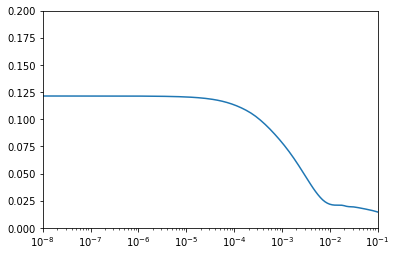

In [21]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-1, 0, 0.2])

In [19]:
#Build the final model with the best learning rate
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = dataset_window(train_price, window_size, batch_size, shuffle_buffer)
val_set = dataset_window(val_price, window_size, batch_size, shuffle_buffer)
print(train_set)
print(train_price.shape)

model = tf.keras.models.Sequential([
          tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1,
                                 padding='causal', activation='relu',
                                 input_shape=[None,1]),
          tf.keras.layers.LSTM(32, return_sequences=True),
          tf.keras.layers.LSTM(16, return_sequences=True),
          tf.keras.layers.Dense(16, activation='relu'),
          tf.keras.layers.Dense(1),
])
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1, momentum=0.9),
              metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit(train_set, epochs=300, validation_data=val_set)

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float32, tf.float32)>
(658,)
Epoch 1/300
2/2 [==============================] - 34s 1s/step - loss: 0.0750 - mean_absolute_error: 0.3293 - val_loss: 0.0222 - val_mean_absolute_error: 0.1512
Epoch 2/300
2/2 [==============================] - 0s 211ms/step - loss: 0.0239 - mean_absolute_error: 0.1734 - val_loss: 0.0476 - val_mean_absolute_error: 0.2764
Epoch 3/300
2/2 [==============================] - 0s 224ms/step - loss: 0.0473 - mean_absolute_error: 0.2755 - val_loss: 0.0301 - val_mean_absolute_error: 0.2186
Epoch 4/300
2/2 [==============================] - 0s 214ms/step - loss: 0.0247 - mean_absolute_error: 0.1925 - val_loss: 0.0186 - val_mean_absolute_error: 0.1404
Epoch 5/300
2/2 [==============================] - 0s 194ms/step - loss: 0.0212 - mean_absolute_error: 0.1471 - val_loss: 0.0295 - val_mean_absolute_error: 0.1757
Epoch 6/300
2/2 [==============================] - 0s 200ms/step - loss: 0.0285 - mean

In [20]:
#Forecasting the testing data
rnn_forecast = forecast_model(model, price[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_val - window_size:-1, -1, 0]

<PrefetchDataset shapes: (None, None, 1), types: tf.float64>


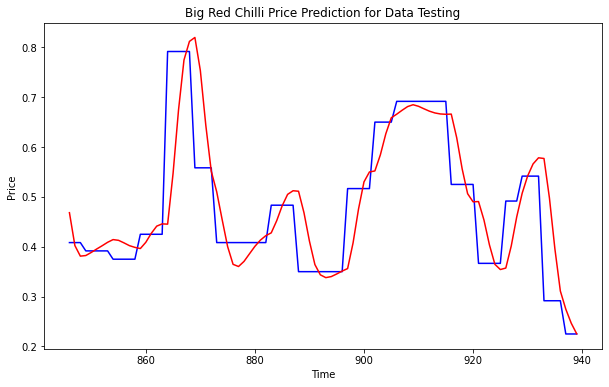

In [21]:
#Plotting the testing data
plt.figure(figsize=(10, 6))
plot_dataset(time=test_time, series=test_price, title='Big Red Chilli Price Prediction for Data Testing',xlabel='Time', ylabel='Price')
plot_dataset(time=test_time, series=rnn_forecast, title='Big Red Chilli Price Prediction for Data Testing', xlabel='Time', ylabel='Price', color='r')

<Figure size 432x288 with 0 Axes>

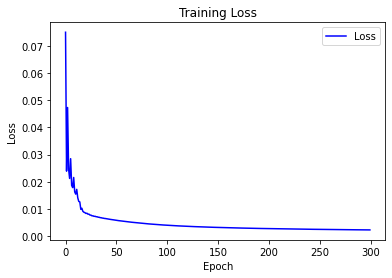

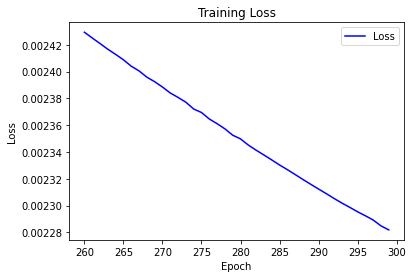

<Figure size 432x288 with 0 Axes>

In [22]:
#Plotting and examining the training loss
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

loss=history.history['loss']

epoch_num=range(len(loss))

plot_dataset(epoch_num, loss, title='Training Loss', xlabel='Epoch', ylabel='Loss')
plt.legend(["Loss"])
plt.figure()

loss_zoom = loss[260:]
epoch_num_zoom = [x+260 for x in range(len(loss_zoom))]

plot_dataset(epoch_num_zoom, loss_zoom, title='Training Loss', xlabel='Epoch', ylabel='Loss')
plt.legend(["Loss"])
plt.figure()

In [23]:
rnn_forecast

array([0.4683265 , 0.40232193, 0.38114032, 0.38236374, 0.38855672,
       0.39547896, 0.40201586, 0.40892285, 0.41433197, 0.41288057,
       0.40775836, 0.40218922, 0.39874807, 0.3963674 , 0.408877  ,
       0.42680156, 0.44131225, 0.44587392, 0.44531116, 0.5472013 ,
       0.674479  , 0.77463937, 0.8119526 , 0.8198266 , 0.7534019 ,
       0.64377886, 0.5515553 , 0.5101759 , 0.45430264, 0.4003676 ,
       0.36466953, 0.36035088, 0.37052512, 0.3857316 , 0.40077177,
       0.41316754, 0.42218107, 0.4278816 , 0.45226035, 0.48207754,
       0.5050807 , 0.5123288 , 0.5113486 , 0.46820748, 0.41127822,
       0.36426672, 0.34365454, 0.33803684, 0.3401168 , 0.34536925,
       0.351179  , 0.3562139 , 0.4078048 , 0.47576275, 0.5301006 ,
       0.55002505, 0.55205303, 0.58421403, 0.62651914, 0.65865386,
       0.6659422 , 0.6738646 , 0.6811887 , 0.6848768 , 0.6817378 ,
       0.67671996, 0.671937  , 0.6684004 , 0.6663748 , 0.66571087,
       0.6661031 , 0.61864406, 0.5561217 , 0.5063974 , 0.49009

In [24]:
temp = len(test_price)-21
temp_1 = len(test_price)-1
temp=test_price[temp:temp_1]

In [25]:
rnn_forecast = forecast_model(model, temp[..., np.newaxis],len(temp)).tolist()
rnn_forecast

<PrefetchDataset shapes: (None, None, 1), types: tf.float64>


[[[0.3927774727344513],
  [0.46229445934295654],
  [0.5026051998138428],
  [0.46151530742645264],
  [0.4039193093776703],
  [0.36740827560424805],
  [0.3475302755832672],
  [0.37493056058883667],
  [0.4233454763889313],
  [0.46776437759399414],
  [0.5038496255874634],
  [0.5323803424835205],
  [0.5503151416778564],
  [0.5549818277359009],
  [0.4815182685852051],
  [0.3846668004989624],
  [0.3040608763694763],
  [0.2708193361759186],
  [0.24497975409030914],
  [0.22538964450359344]]]

In [26]:
round(rnn_forecast[-1][-1][0]*max)

13523

In [27]:
model.save("big_red_chilli_model")

INFO:tensorflow:Assets written to: big_red_chilli_model/assets


INFO:tensorflow:Assets written to: big_red_chilli_model/assets


In [28]:
!zip -r big_red_chilli_model.zip big_red_chilli_model

  adding: big_red_chilli_model/ (stored 0%)
  adding: big_red_chilli_model/assets/ (stored 0%)
  adding: big_red_chilli_model/keras_metadata.pb (deflated 91%)
  adding: big_red_chilli_model/saved_model.pb (deflated 90%)
  adding: big_red_chilli_model/variables/ (stored 0%)
  adding: big_red_chilli_model/variables/variables.data-00000-of-00001 (deflated 14%)
  adding: big_red_chilli_model/variables/variables.index (deflated 66%)
